<a href="https://colab.research.google.com/github/asu-trans-ai-lab/OSM2GMNS/blob/master/osm2gmns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 0: load the OSM file from the repository of OSM testing datasets**

In [1]:
!rm -rf ./osm_test_data_set/
!git clone https://github.com/asu-trans-ai-lab/osm_test_data_set

%cd osm_test_data_set

Cloning into 'osm_test_data_set'...
remote: Enumerating objects: 280, done.
remote: Total 280 (delta 0), reused 0 (delta 0), pack-reused 280
Receiving objects: 100% (280/280), 149.65 MiB | 22.13 MiB/s, done.
Resolving deltas: 100% (89/89), done.
Checking out files: 100% (76/76), done.
/content/osm_test_data_set


Check the file icon on the left hand side, makesure file map.osm exists.

**Step 1: install python packages**

In [2]:
!pip install osm2gmns


     |████████████████████████████████| 64 kB 2.2 MB/s 
     |████████████████████████████████| 1.3 MB 9.9 MB/s 


**Step 2: convert OSM to GMNS Files**

arguments used for network parsing:
  filename: map.osm
  network_types: ('auto',)
  link_types: ('motorway', 'primary', 'secondary')
  POI: False
  POI_sampling_ratio: 1.0
  strict_mode: True
  offset: no
  min_nodes: 1
  combine: False
  bbox: None
  default_lanes: True
  default_speed: True
  default_capacity: True

Building Network from OSM file
  reading osm file
  parsing osm network
    generating nodes and links
  number of nodes: 403, number of links: 574, number of pois: 0
Generating Node Activity Information
Consolidating Complex Intersections
Building Multiresolution Networks


/usr/local/lib/python3.7/dist-packages/osm2gmns/multiresolutionnet/build_mrnet.py:122: ShapelyDeprecationWarning: The 'almost_equals()' method is deprecated and will be removed in Shapely 2.0
  if geometry_xy_a_r.almost_equals(link_b.geometry_xy, decimal=1):


  generating normal meso links...


/usr/local/lib/python3.7/dist-packages/osm2gmns/multiresolutionnet/netgen.py:57: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in lane_geometry_xy: coords += line.coords


  generating movement meso links...
Outputting Network Files
Outputting Network Files


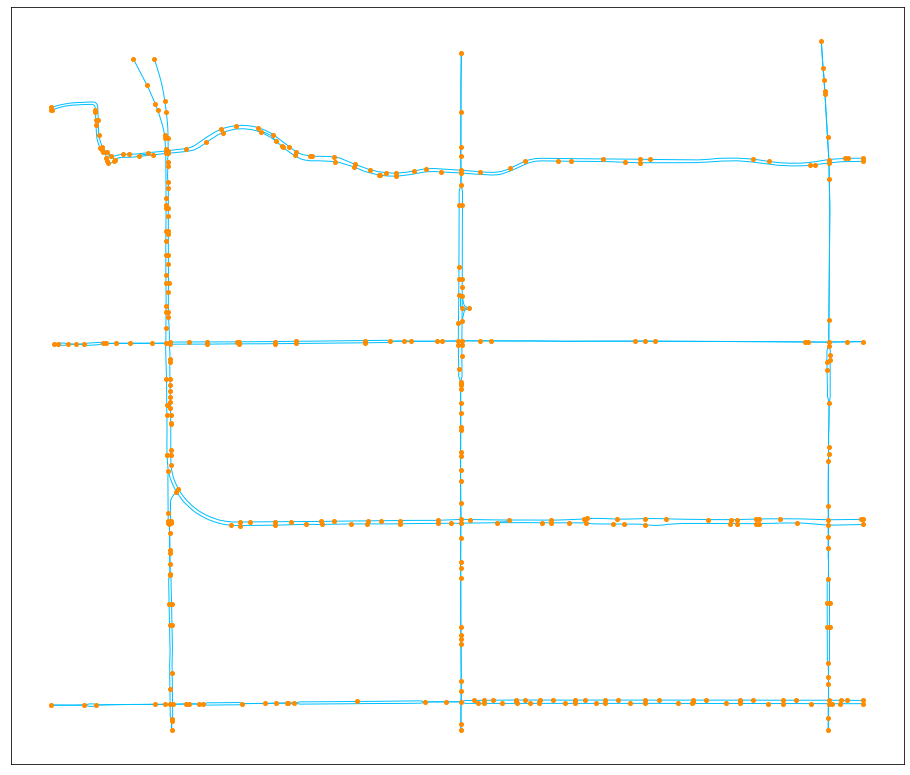

In [15]:
import osm2gmns as og
net = og.getNetFromFile('map.osm', link_types=('motorway','primary','secondary' ),    # 'trunk','primary','secondary', 'tertiary'
                        default_lanes=True, default_speed=True, default_capacity=True)
og.generateNodeActivityInfo(net)
og.consolidateComplexIntersections(net)
og.buildMultiResolutionNets(net)
og.outputNetToCSV(net, output_folder='MRM')
og.outputNetToCSV(net)
og.show(net)
#og.saveFig(net)

Check node.csv, link.csv and poi.csv exist in the left-hand-side Colab folder.

osm2gmns, version 0.4.2


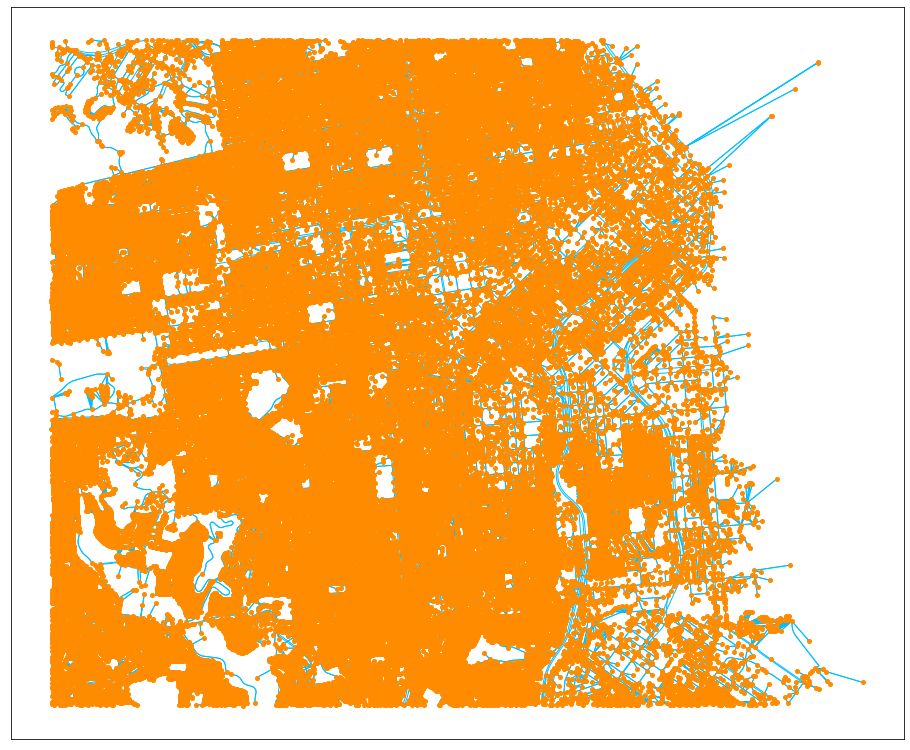

Figure is saved to network.jpg


In [ ]:
import osm2gmns as og
net = og.getNetFromPBFFile('market_street.pbf', POIs=True)  # getNetFromPBFFile other than getNetFromOSMFile
og.connectPOIWithNet(net)
og.generateNodeActivityInfo(net)
og.consolidateComplexIntersections(net)
og.outputNetToCSV(net, output_folder='consolidated')
og.outputNetToCSV(net)
og.show(net)
og.saveFig(net)

**Step 4: Download data files**



In [ ]:
% cd ../
!zip -r /content/osm_test_data_set/map.zip /content/osm_test_data_set/


/content
  adding: content/osm_test_data_set/ (stored 0%)
  adding: content/osm_test_data_set/log.txt (deflated 96%)
  adding: content/osm_test_data_set/market_street.pbf (deflated 0%)
  adding: content/osm_test_data_set/link.csv (deflated 82%)
  adding: content/osm_test_data_set/accessibility.csv (deflated 81%)
  adding: content/osm_test_data_set/consolidated/ (stored 0%)
  adding: content/osm_test_data_set/consolidated/link.csv (deflated 82%)
  adding: content/osm_test_data_set/consolidated/node.csv (deflated 69%)
  adding: content/osm_test_data_set/consolidated/poi.csv (deflated 76%)
  adding: content/osm_test_data_set/.git/ (stored 0%)
  adding: content/osm_test_data_set/.git/index (deflated 47%)
  adding: content/osm_test_data_set/.git/config (deflated 34%)
  adding: content/osm_test_data_set/.git/packed-refs (deflated 10%)
  adding: content/osm_test_data_set/.git/info/ (stored 0%)
  adding: content/osm_test_data_set/.git/info/exclude (deflated 28%)
  adding: content/osm_test_data

In [ ]:
from google.colab import files
files.download("/content/osm_test_data_set/map.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step 5: Visualization using GMNS tool:**
By simply uploading node.csv and link.csv at https://asu-trans-ai-lab.github.io/index.html#,  
 you can easily create custom online maps for any GMNS network files. 
To view zone and demand information please visit this page to use QGIS/NeXTA tools. https://github.com/asu-trans-ai-lab/traffic-engineering-and-analysis/blob/master/undergraduate_student_project/QGIS%20For%20Gmns%20User%20Guide_v0.5.pdf 

**Option for downloading OSM map.osm file for the area of interest**

On OpenStreetMap homepage, click the Export button to enter Export mode. Before downloading, you may need to span and zoom in/out the map to make sure that your target area is properly shown on the screen. Or, you can use Manually select a different area to select your area more precisely. Click the Export button in blue to export the network you want.

Note that if the target area is too large, you may get an error message: “You requested too many nodes (limit is 50000). Either request a smaller area, or use planet.osm”. In this case, you can always click Overpass API to download the network you need via a mirror site.

You can uploda the file as shown below to Google Colab environment and repeat from step 2 of running OSM2GMNS to step 5



In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

